In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df.duplicated("customerID").sum()

np.int64(0)

In [11]:
def conv(value):
  if value==1:
    return "yes"
  else:
    return "no"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

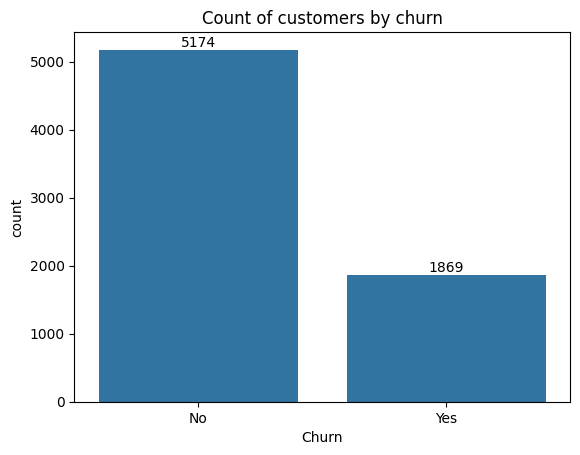

In [12]:
ax = sns.countplot(x = df["Churn"],data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by churn")
plt.show()

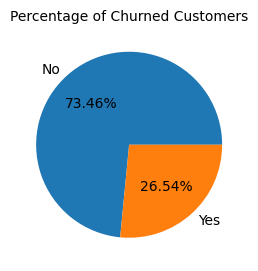

In [13]:
plt.figure(figsize=(3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb["Churn"],labels=gb.index, autopct= "%1.2f%%")
plt.title("Percentage of Churned Customers",fontsize=10)
plt.show()


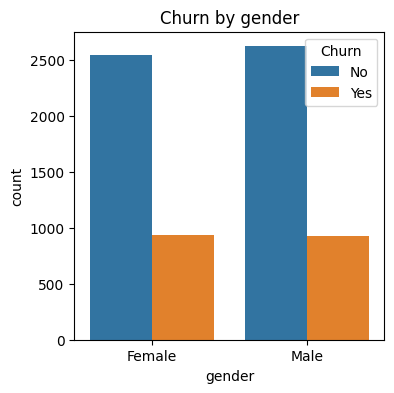

In [14]:
plt.figure(figsize=(4,4))
sns.countplot(x="gender",data = df,hue="Churn")
plt.title("Churn by gender")
plt.show()

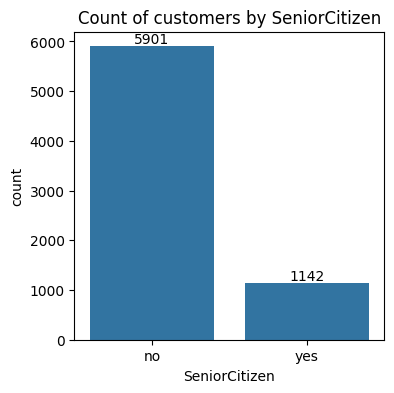

In [15]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="SeniorCitizen",data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by SeniorCitizen")
plt.show()

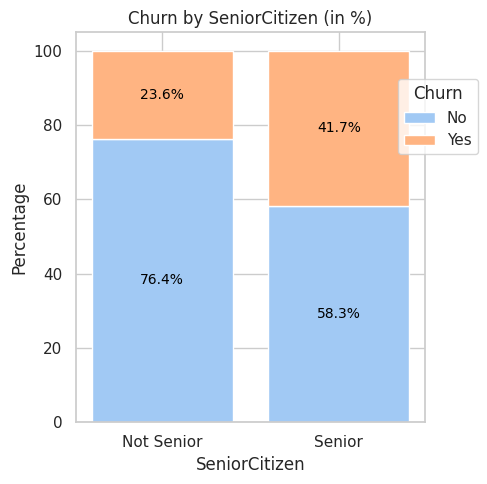

In [16]:
sns.set(style="whitegrid")

# Step 1: Prepare the data
# Count churn per SeniorCitizen category
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack().fillna(0)

# Step 2: Convert to percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Step 3: Plot stacked bar chart
fig, ax = plt.subplots(figsize=(5, 5))

# Bars for 'No' churn
ax.bar(percentages.index, percentages['No'], label='No', color=sns.color_palette("pastel")[0])

# Bars for 'Yes' churn (stacked on top of 'No')
ax.bar(percentages.index, percentages['Yes'], bottom=percentages['No'], label='Yes', color=sns.color_palette("pastel")[1])

# Step 4: Add percentage labels
for i in range(len(percentages)):
    no_val = percentages['No'].iloc[i]
    yes_val = percentages['Yes'].iloc[i]

    # Label for 'No'
    ax.text(i, no_val / 2, f'{no_val:.1f}%', ha='center', va='center', fontsize=10, color='black')

    # Label for 'Yes'
    ax.text(i, no_val + yes_val / 2, f'{yes_val:.1f}%', ha='center', va='center', fontsize=10, color='black')

# Step 5: Final touches
ax.set_title("Churn by SeniorCitizen (in %)")
ax.set_xlabel("SeniorCitizen")
ax.set_ylabel("Percentage")
ax.set_xticks([0, 1])
ax.set_xticklabels(['Not Senior', 'Senior'])
ax.legend(title="Churn",bbox_to_anchor= (0.9,0.9))

plt.tight_layout()
plt.show()

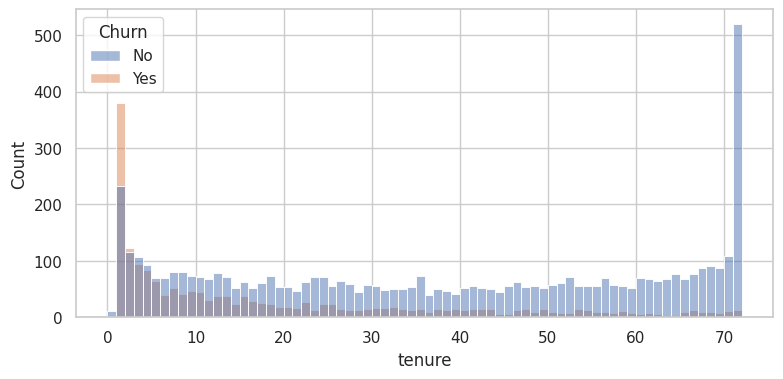

In [17]:
    plt.figure(figsize=(9,4))
    sns.histplot(x = "tenure",data = df,bins=72,hue="Churn")
    plt.show()

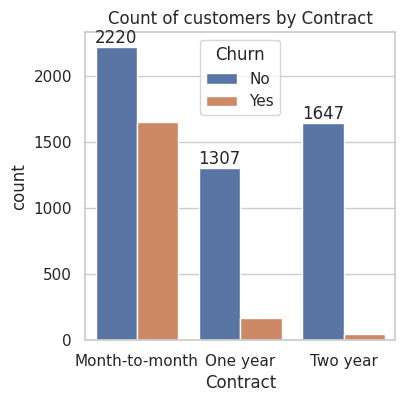

In [18]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract",data = df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Contract")
plt.show()

In [19]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

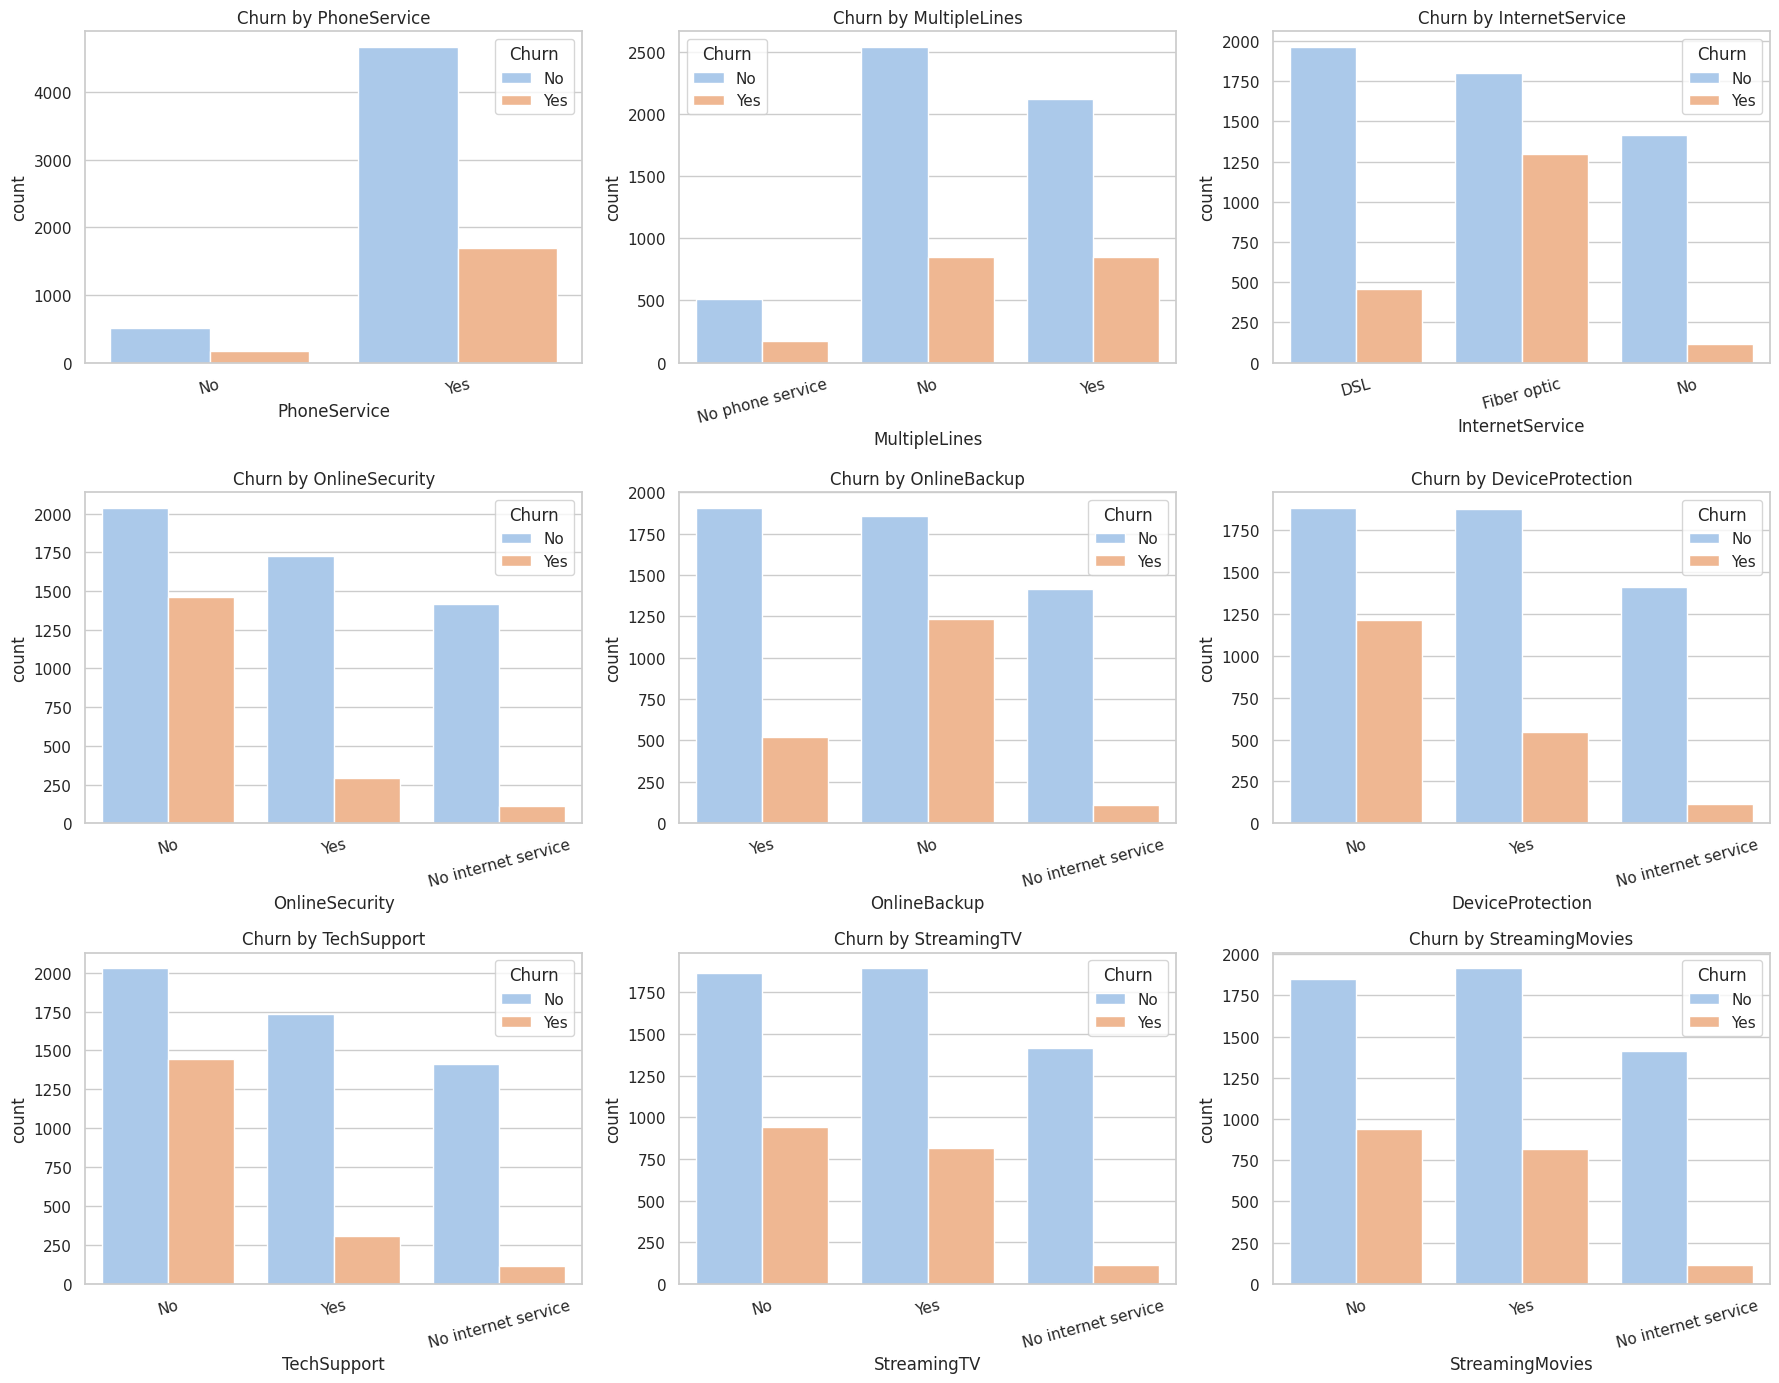

In [20]:
# Define the columns you want to plot
cols_to_plot = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set seaborn style
sns.set(style="whitegrid")

# Subplot grid configuration
cols = 3
rows = (len(cols_to_plot) + cols - 1) // cols  # ceil division

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, 14))
axes = axes.flatten()  # flatten for easy indexing

# Loop through each column and create countplot
for i, col in enumerate(cols_to_plot):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i], palette="pastel")
    axes[i].set_title(f"Churn by {col}")
    axes[i].tick_params(axis='x', rotation=15)
    axes[i].legend(title='Churn')

# Remove any unused axes
for j in range(len(cols_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


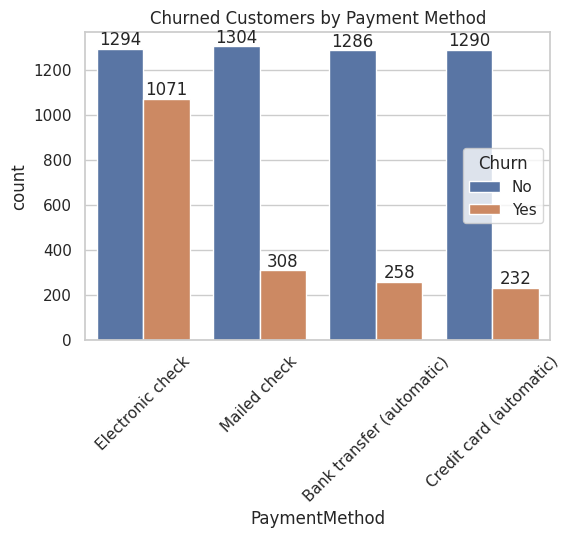

In [21]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x="PaymentMethod",data = df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=45)
plt.title("Churned Customers by Payment Method")
plt.show()